## Dataset: https://archive.ics.uci.edu/ml/datasets/gas+sensor+array+under+dynamic+gas+mixtures

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from reader import load_data
from visualize import plot_raw_data, plot_prediction
from preprocess import preprocess, generate_labels, generate_train_test_sets, get_gas_names
from feature_selection import reduce_dimension, fit_PCA, fit_LDA
from models import predict_RF, predict_SVM 

# Main program

In [7]:
features = pd.DataFrame(x_test_transformed, columns = ['Feature 1', 'Feature 2', 'Feature 3'])
features['Label'] = y_predict
features.to_json('./output/classified_features.json')

Number of data samples:  4178504
   Time  Methane_conc  Ethylene_conc  TGS2602-1  TGS2602-2  TGS2600-1  \
0  0.00           0.0            0.0     -41.98    2067.64     -37.13   
1  0.01           0.0            0.0     -46.50    2067.88     -28.56   
2  0.02           0.0            0.0     -36.16    2055.81     -10.89   
3  0.03           0.0            0.0     -50.36    2053.68     -31.96   
4  0.04           0.0            0.0     -37.30    2081.17     -36.16   
5  0.05           0.0            0.0     -48.43    2058.64     -32.61   
6  0.06           0.0            0.0     -46.17    2065.99     -33.74   
7  0.07           0.0            0.0     -42.78    2067.64     -32.28   
8  0.08           0.0            0.0     -40.85    2061.72     -34.87   
9  0.09           0.0            0.0     -55.68    2079.51     -33.09   

   TGS2600-2  TGS2610-1  TGS2610-2  TGS2620-1  TGS2620-2  TGS2602-3  \
0       2.28       8.63     -26.62      -8.46      -0.33    3437.73   
1      13.69     -12.

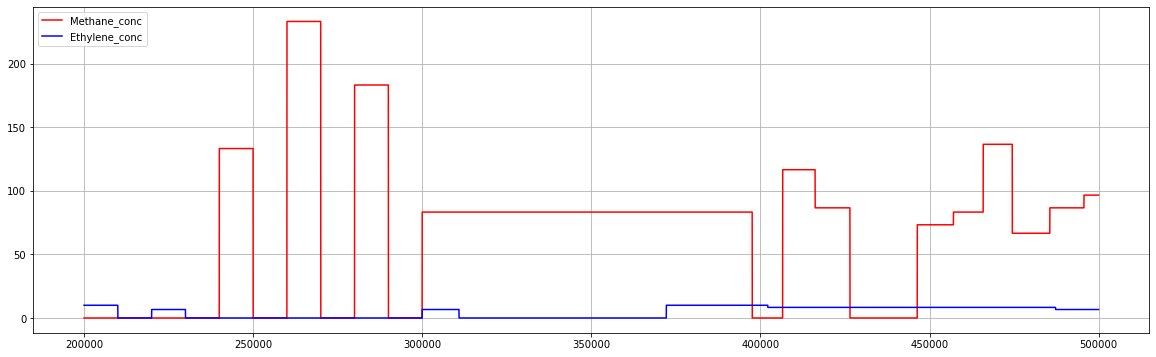

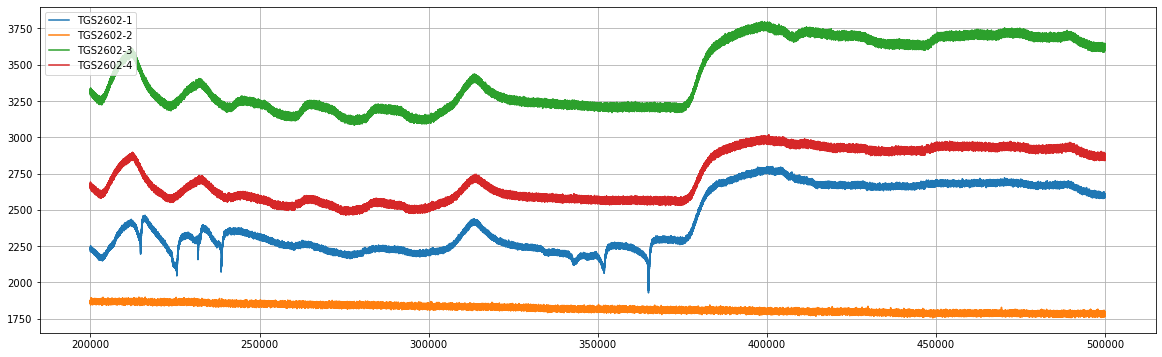

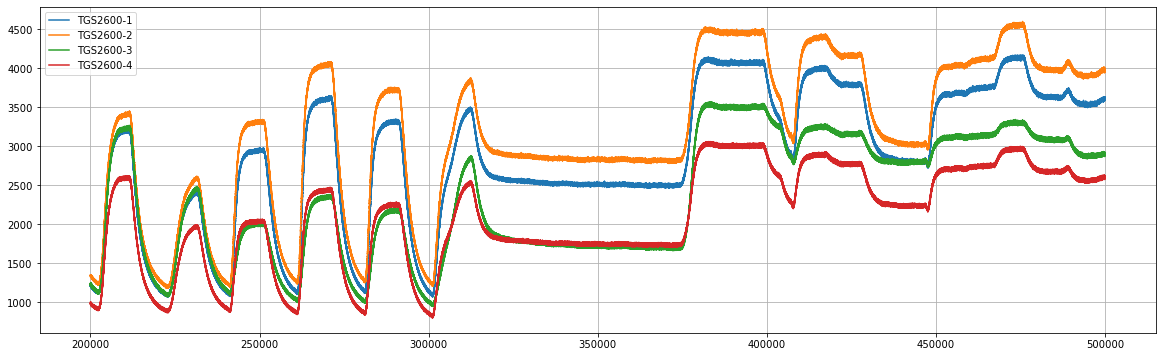

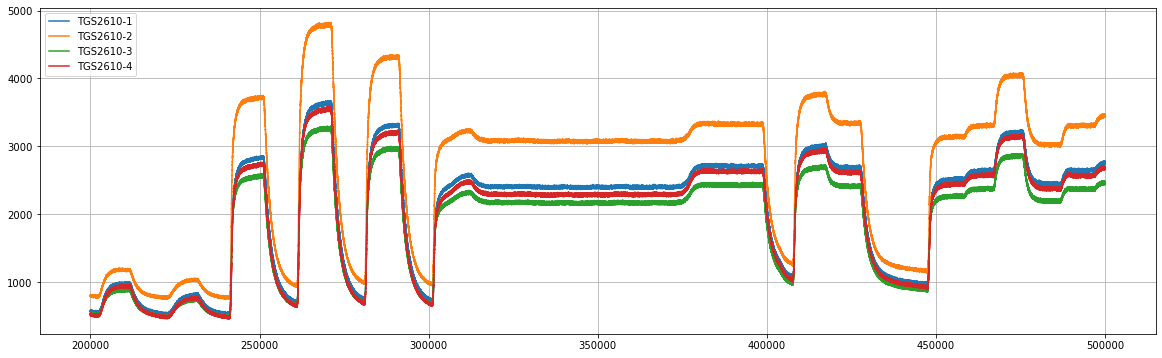

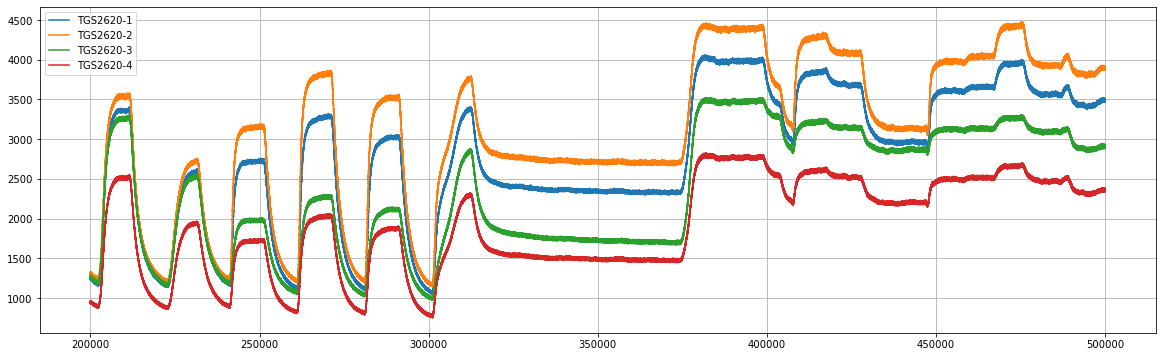

Number of samples for training:  29253
0    9584
1    7042
2    6671
3    5956
Name: Label, dtype: int64
Number of samples for testing:  12538
0    4066
1    3003
2    2900
3    2569
Name: Label, dtype: int64
              precision    recall  f1-score   support

     Neutral       0.93      0.93      0.93      4066
     Methane       0.95      0.95      0.95      3003
    Ethylene       0.92      0.91      0.91      2900
     Mixture       0.95      0.95      0.95      2569

    accuracy                           0.93     12538
   macro avg       0.94      0.93      0.94     12538
weighted avg       0.93      0.93      0.93     12538



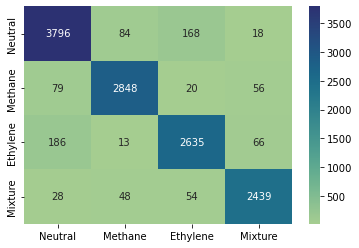

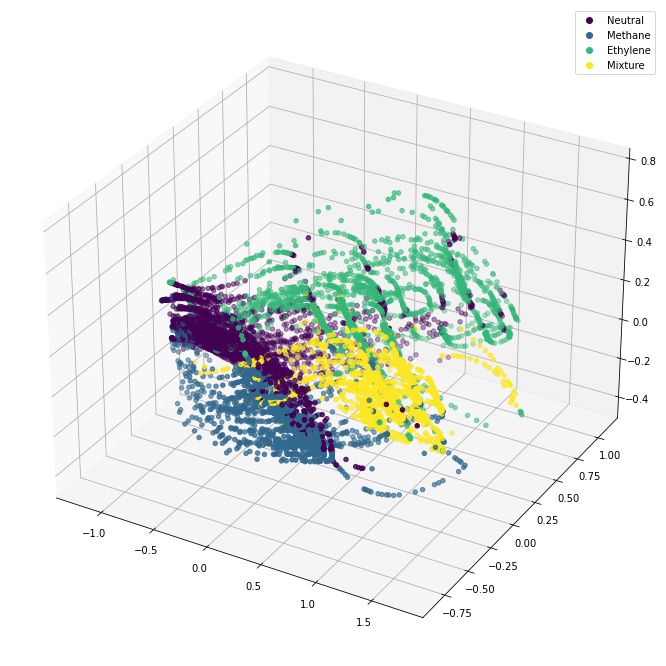

In [4]:
data_path = "./data/gas_mixture_dataset"
data_type = 1 # 1: ethylene + methane; 2: ethylene + CO  


fname, gas1_name, gas2_name, gas1_col, gas2_col, col_names = get_gas_names(data_type)

# load raw data
raw_data = load_data(os.path.join(data_path, fname), col_names, display=True)
plot_raw_data(raw_data, start=200000, end=500000)

# preprocessing
processed_data = preprocess(raw_data, fs='1s', display=False)
# plot_raw_data(processed_data, start=2000, end=5000)

# APPROACH 1: with labeled data 
#   - PCA + RF -> 94% 
#   - PCA + SVM -> 76% 
#   - LDA + RF -> 88% 
#   - LDA + SVM -> 85%

# APPROACH 2 (without labeled data): 
#   - PCA + KNN
#   - LDA + KNN

labeled_data = generate_labels(processed_data, gas1_col, gas2_col, display=False)
x_train, x_test, y_train, y_test = generate_train_test_sets(labeled_data, gas1_col, gas2_col, test_set_ratio=0.3, display=True)

# x_train_transformed, x_test_transformed = fit_LDA(x_train, y_train, x_test, n_comp=3)
x_train_transformed, x_test_transformed = fit_PCA(x_train, x_test, n_comp=3)

y_predict = predict_RF(x_train_transformed, y_train, x_test_transformed, n_estimators=15)
# y_predict = predict_SVM(x_train_transformed, y_train, x_test_transformed)

plot_prediction(x_test_transformed, y_test, y_predict, gas1_name, gas2_name)



# APPROACH 2: (without labeled data): PCA -> K-means
# dimension reduction
# new_features = dimension_reduction(processed_data, n_comp=4, display=True)

# generate labels from raw dataset
# labeled_data = generate_labels(processed_data, 0, 1)


In [19]:
!python main.py

{'Neutral': {'precision': 0.949271451699946, 'recall': 0.9510678561773452, 'f1-score': 0.95016880486158, 'support': 3699}, 'CO': {'precision': 0.9303295786399666, 'recall': 0.9354026845637584, 'f1-score': 0.9328592344697761, 'support': 2384}, 'Ethylene': {'precision': 0.934399117971334, 'recall': 0.9341416368145494, 'f1-score': 0.934270359652749, 'support': 3629}, 'Mixture': {'precision': 0.9444060773480663, 'recall': 0.9382504288164666, 'f1-score': 0.9413181896403373, 'support': 2915}, 'accuracy': 0.9402866872574641, 'macro avg': {'precision': 0.9396015564148281, 'recall': 0.9397156515930298, 'f1-score': 0.9396541471561106, 'support': 12627}, 'weighted avg': {'precision': 0.9402976898632586, 'recall': 0.9402866872574641, 'f1-score': 0.9402883093482489, 'support': 12627}}
Figure(640x480)
Figure(1200x1200)


In [1]:
import os
import numpy as np
import pandas as pd
from reader import load_data
from postprocess import postprocess, plot_raw_data
from preprocess import preprocess, generate_labels, generate_train_test_sets, get_gas_names
from feature_selection import reduce_dimension, fit_PCA, fit_LDA
from models import predict_RF, predict_SVM 

def load_raw_data(data_path, data_type):
    fname, gas1_name, gas2_name, gas1_col, gas2_col, col_names = get_gas_names(data_type)
    raw_data = load_data(os.path.join(data_path, fname), col_names, display=False)
    # plot_raw_data(raw_data, start=200000, end=500000)

    raw_data_json = raw_data.to_json(orient="split")
    return raw_data_json


def analyze_data(data_json, data_type):
    data = pd.read_json(data_json, orient="split")
    _, gas1_name, gas2_name, gas1_col, gas2_col, _ = get_gas_names(data_type)

    # preprocessing
    processed_data = preprocess(data, fs='1s', display=False)
    # plot_raw_data(processed_data, start=2000, end=5000)

    # generate train, test sets 
    labeled_data = generate_labels(processed_data, gas1_col, gas2_col, display=False)
    x_train, x_test, y_train, y_test = generate_train_test_sets(labeled_data, gas1_col, gas2_col, test_set_ratio=0.3, display=False)

    # feature analysis
    x_train_transformed, x_test_transformed = fit_PCA(x_train, x_test, n_comp=3)
    # x_train_transformed, x_test_transformed = fit_LDA(x_train, y_train, x_test, n_comp=3)

    # classification 
    y_predict = predict_RF(x_train_transformed, y_train, x_test_transformed, n_estimators=15)
    # y_predict = predict_SVM(x_train_transformed, y_train, x_test_transformed)

    json_1, json_2, json_3 = postprocess(x_test_transformed, y_test, y_predict, gas1_name, gas2_name, display=True)
            
    return json_1, json_2, json_3

{'Neutral': {'precision': 0.9512459371614301, 'recall': 0.9494457961611247, 'f1-score': 0.9503450142064673, 'support': 3699}, 'CO': {'precision': 0.9339822259839188, 'recall': 0.925755033557047, 'f1-score': 0.9298504318516959, 'support': 2384}, 'Ethylene': {'precision': 0.9303088275485105, 'recall': 0.9379994488839901, 'f1-score': 0.934138309549945, 'support': 3629}, 'Mixture': {'precision': 0.9430140748369379, 'recall': 0.9423670668953688, 'f1-score': 0.9426904598490049, 'support': 2915}, 'accuracy': 0.9400491011324938, 'macro avg': {'precision': 0.9396377663826992, 'recall': 0.9388918363743827, 'f1-score': 0.9392560538642784, 'support': 12627}, 'weighted avg': {'precision': 0.9400688296213678, 'recall': 0.9400491011324938, 'f1-score': 0.9400507050685646, 'support': 12627}}


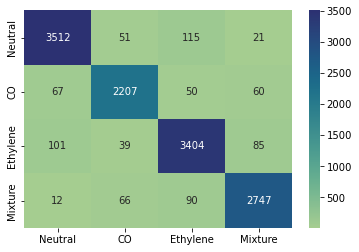

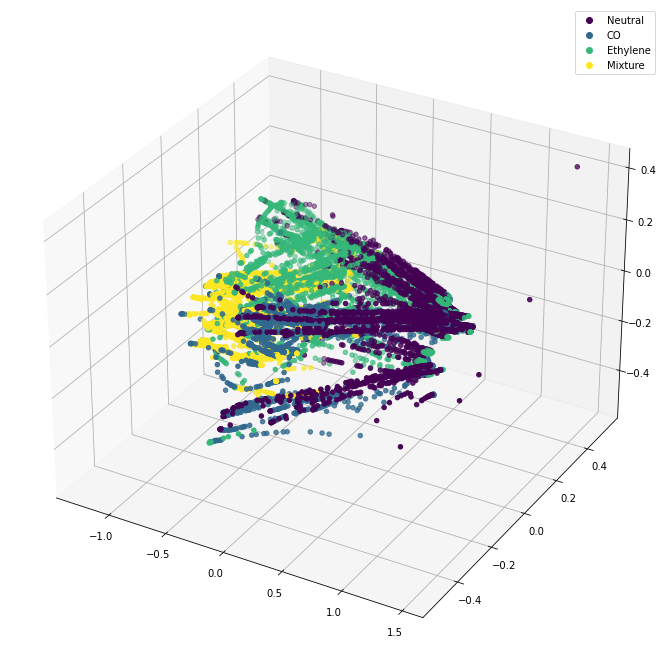

In [2]:
data_path = "./data/gas_mixture_dataset"
data_type = 2 # 1: ethylene + methane; 2: ethylene + CO  
raw_data_json = load_raw_data(data_path, data_type)
json_1, json_2, json_3 = analyze_data(raw_data_json, data_type)

In [ ]:
data_path = "./data/gas_mixture_dataset"
co_filename = "ethylene_CO.txt"
methane_filename = "ethylene_methane.txt"

In [ ]:
# ethylene methane (EM) data 
# 'ethylene_CO.txt': contains the recordings from the sensors when exposed to mixtures of Ethylene and CO in air.
em_df = pd.read_csv(os.path.join(data_path, methane_filename), skiprows=1, header=None, delim_whitespace=True)
em_df.columns = ['Time', 'Methane_conc', 'Ethylene_conc', 
                 'TGS2602-1', 'TGS2602-2', 'TGS2600-1', 'TGS2600-2', 
                 'TGS2610-1', 'TGS2610-2', 'TGS2620-1', 'TGS2620-2',
                 'TGS2602-3', 'TGS2602-4', 'TGS2600-3', 'TGS2600-4', 
                 'TGS2610-3', 'TGS2610-4', 'TGS2620-3', 'TGS2620-4']
print("Number of samples: ", em_df.shape[0])
em_df.head()

Number of samples:  4178504


,Time,Methane_conc,Ethylene_conc,TGS2602-1,TGS2602-2,TGS2600-1,TGS2600-2,TGS2610-1,TGS2610-2,TGS2620-1,TGS2620-2,TGS2602-3,TGS2602-4,TGS2600-3,TGS2600-4,TGS2610-3,TGS2610-4,TGS2620-3,TGS2620-4
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,-0.33,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,-5.04,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,2.28,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,-0.65,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59


### Visualize raw data

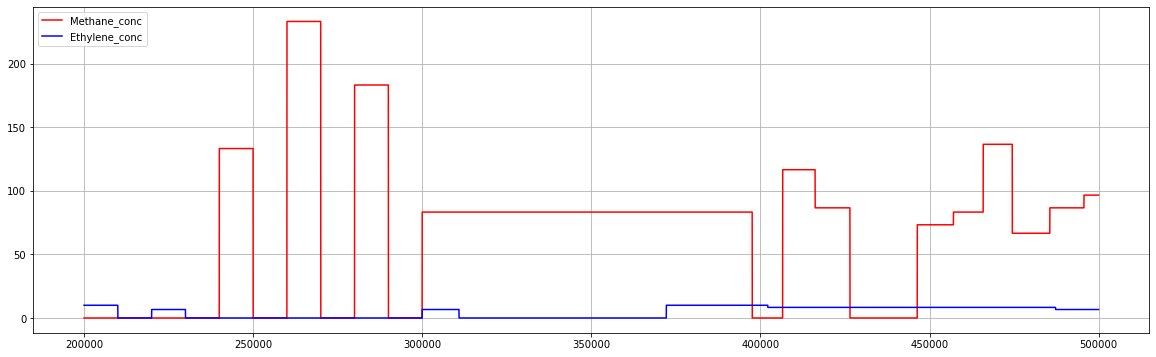

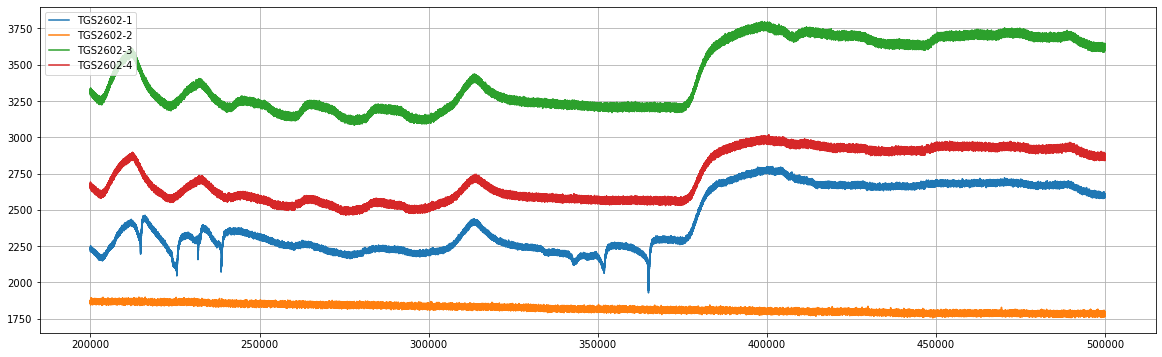

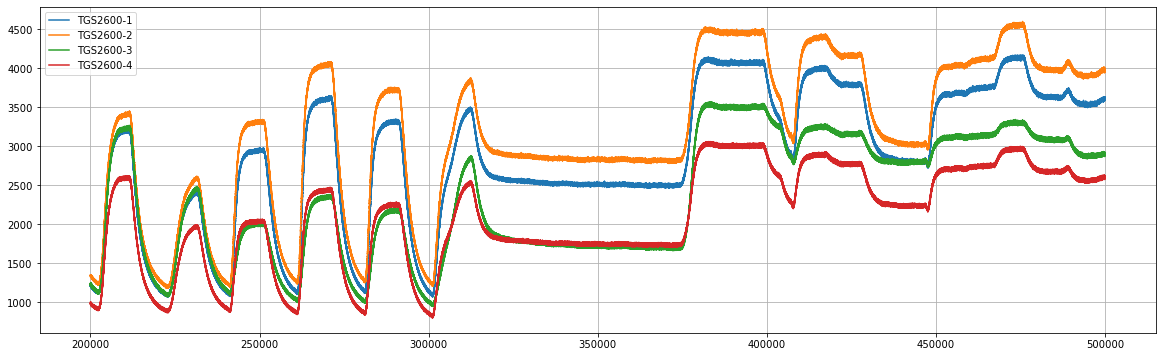

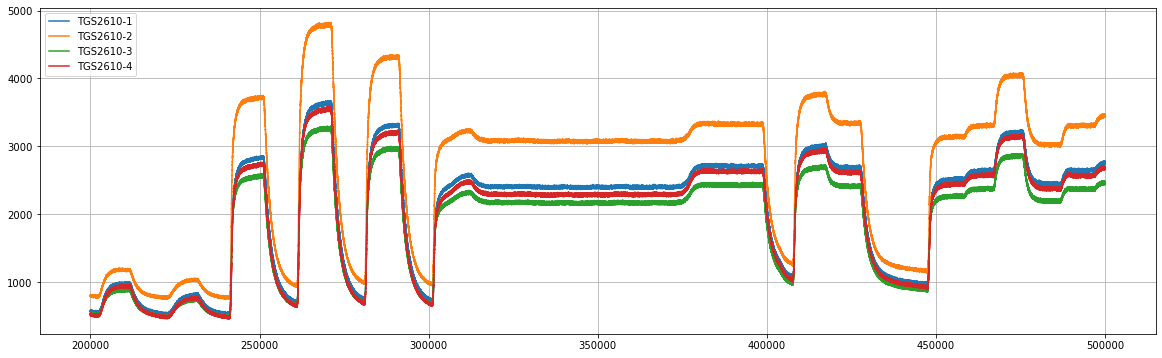

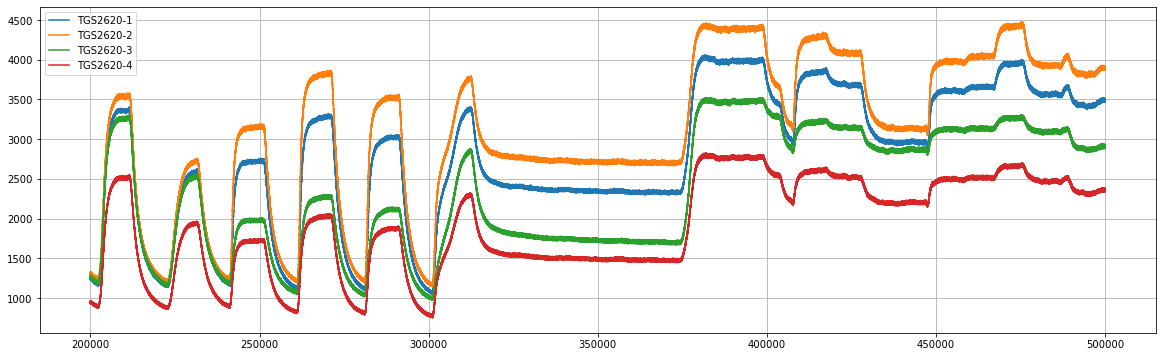

In [55]:
start = 200000
end = 500000


fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='Methane_conc', color='red', ax=ax)
em_df[start:end].plot(y='Ethylene_conc', color='blue', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()
fig.savefig('methane_vs_ethylene.png')

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2602-1', ax=ax)
em_df[start:end].plot(y='TGS2602-2', ax=ax)
em_df[start:end].plot(y='TGS2602-3', ax=ax)
em_df[start:end].plot(y='TGS2602-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()
fig.savefig('TGS2602.png')

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2600-1', ax=ax)
em_df[start:end].plot(y='TGS2600-2', ax=ax)
em_df[start:end].plot(y='TGS2600-3', ax=ax)
em_df[start:end].plot(y='TGS2600-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()
fig.savefig('TGS2600.png')

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2610-1', ax=ax)
em_df[start:end].plot(y='TGS2610-2', ax=ax)
em_df[start:end].plot(y='TGS2610-3', ax=ax)
em_df[start:end].plot(y='TGS2610-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()
fig.savefig('TGS2610.png')

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2620-1', ax=ax)
em_df[start:end].plot(y='TGS2620-2', ax=ax)
em_df[start:end].plot(y='TGS2620-3', ax=ax)
em_df[start:end].plot(y='TGS2620-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()
fig.savefig('TGS2620.png')

### Preprocess data

In [5]:
# create timedate index 
processed_df = em_df
processed_df["Time"] = pd.to_timedelta(processed_df["Time"], unit='s')
processed_df = processed_df.set_index('Time')

# min-max normalization
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(processed_df.values)
scaled_df = pd.DataFrame(scaled_df, columns=processed_df.columns)
scaled_df.index = processed_df.index

# downsampling to 1 second interval
scaled_df = scaled_df.resample('10s').mean()

print("Number of samples after normalization: ", scaled_df.shape[0])
scaled_df.head()

Number of samples after normalization:  4180


,Methane_conc,Ethylene_conc,TGS2602-1,TGS2602-2,TGS2600-1,TGS2600-2,TGS2610-1,TGS2610-2,TGS2620-1,TGS2620-2,TGS2602-3,TGS2602-4,TGS2600-3,TGS2600-4,TGS2610-3,TGS2610-4,TGS2620-3,TGS2620-4
Time,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0.0,0.0,0.339637,0.060391,0.435042,0.435135,0.511181,0.498301,0.432443,0.460782,0.316347,0.314575,0.800928,0.978773,0.981738,0.985838,0.728225,0.797471
0 days 00:00:10,0.0,0.0,0.741987,0.059962,0.967936,0.967795,0.960037,0.933427,0.853896,0.884382,0.337800,0.337290,0.745586,0.914576,0.942582,0.949830,0.678306,0.756541
0 days 00:00:20,0.0,0.0,0.747490,0.058871,0.815642,0.814185,0.743564,0.730451,0.701129,0.705304,0.376451,0.380658,0.638549,0.775039,0.650297,0.673701,0.546274,0.609772
0 days 00:00:30,0.0,0.0,0.729775,0.057809,0.629475,0.626960,0.503826,0.493271,0.521788,0.514185,0.380876,0.396247,0.486890,0.570589,0.400419,0.410875,0.385965,0.420793
0 days 00:00:40,0.0,0.0,0.710372,0.056787,0.494844,0.491047,0.372685,0.363990,0.414771,0.406574,0.353459,0.376962,0.366393,0.416752,0.268932,0.271548,0.287924,0.305378


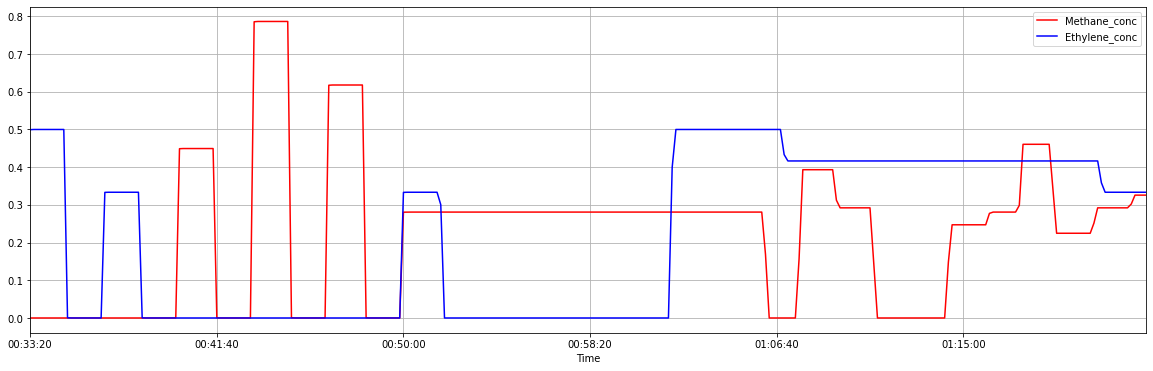

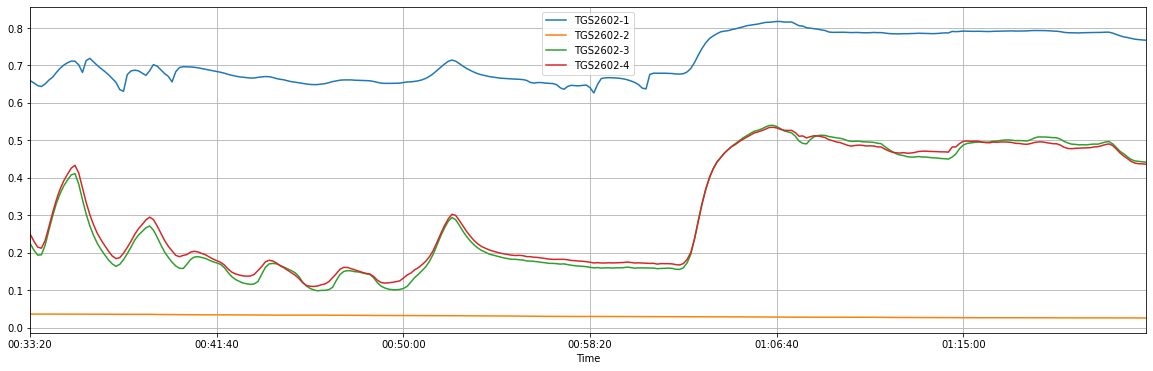

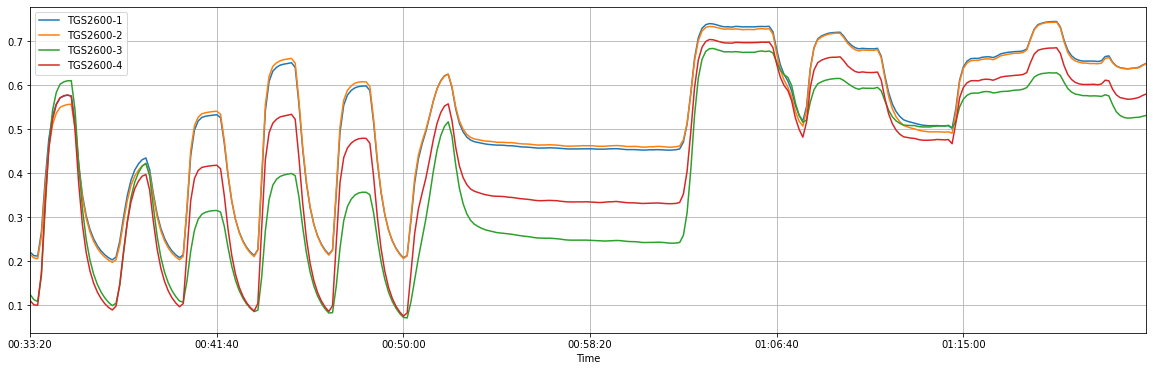

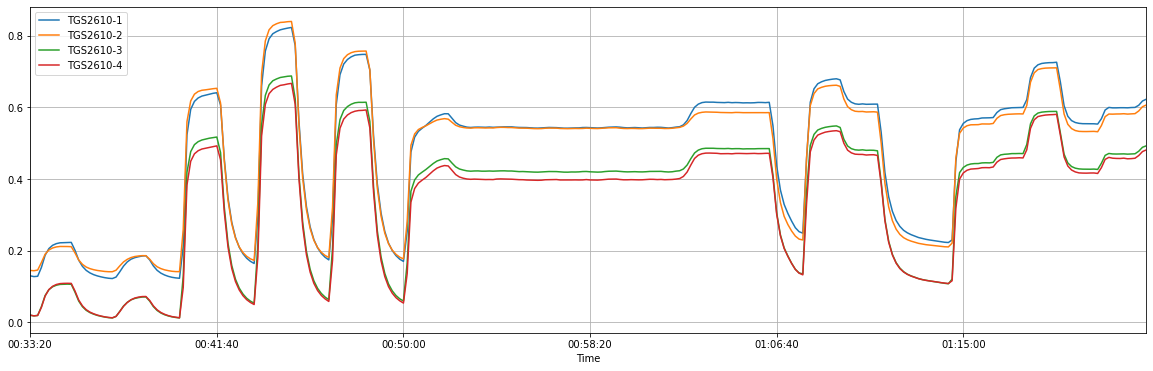

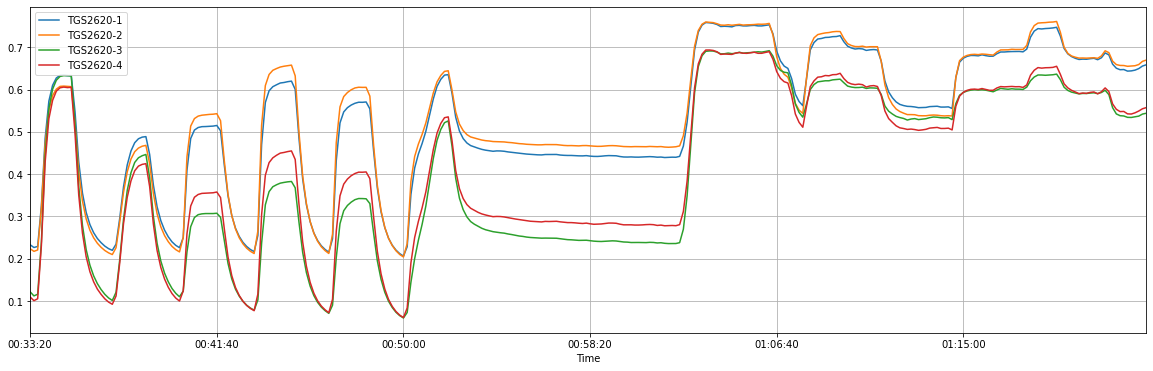

In [6]:
start = 200
end = 500


fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='Methane_conc', color='red', ax=ax)
scaled_df[start:end].plot(y='Ethylene_conc', color='blue', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2602-1', ax=ax)
scaled_df[start:end].plot(y='TGS2602-2', ax=ax)
scaled_df[start:end].plot(y='TGS2602-3', ax=ax)
scaled_df[start:end].plot(y='TGS2602-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2600-1', ax=ax)
scaled_df[start:end].plot(y='TGS2600-2', ax=ax)
scaled_df[start:end].plot(y='TGS2600-3', ax=ax)
scaled_df[start:end].plot(y='TGS2600-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2610-1', ax=ax)
scaled_df[start:end].plot(y='TGS2610-2', ax=ax)
scaled_df[start:end].plot(y='TGS2610-3', ax=ax)
scaled_df[start:end].plot(y='TGS2610-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2620-1', ax=ax)
scaled_df[start:end].plot(y='TGS2620-2', ax=ax)
scaled_df[start:end].plot(y='TGS2620-3', ax=ax)
scaled_df[start:end].plot(y='TGS2620-4', ax=ax)
plt.grid()
plt.show()

### PCA & LDA

In [27]:
num_components = 8

# PCA
pca = PCA(n_components='mle')
pca.fit(scaled_df.iloc[:, 2:])
print("PCA number of features during fitting: ", pca.n_features_in_)
print("PCA estimated number of components: ", pca.n_components_)
print("PCA components: \n", pca.components_)
print("PCA variance: ", pca.explained_variance_)
print("PCA singular values: ", pca.singular_values_)

PCA number of features during fitting:  16
PCA estimated number of components:  15
PCA components: 
 [[ 5.40761477e-02 -3.29147025e-04  2.82157752e-01  2.81325072e-01  2.65235979e-01  2.51721046e-01  2.81491951e-01  2.89895672e-01  1.46164400e-01  1.31482277e-01  2.94022489e-01  3.19627317e-01  2.54321866e-01  2.51595498e-01  2.99667094e-01  3.10298728e-01]
 [ 1.26934803e-01 -4.77225275e-03  2.27857120e-02  2.58667847e-03 -3.88105145e-01 -4.09020931e-01  8.63476223e-02  3.70289185e-02  2.99553936e-01  3.04666306e-01  2.54636505e-01  1.21869747e-01 -3.78299144e-01 -3.63722200e-01  2.75849297e-01  2.06990591e-01]
 [-2.32994977e-01  4.20118485e-02  7.87676864e-02  6.67133496e-02 -1.36856200e-01 -1.57883164e-01  1.37287516e-01  1.19419095e-01 -5.92779299e-01 -5.89386303e-01  1.31371879e-01  1.44471963e-01 -1.42774213e-01 -1.32176632e-01  2.05160506e-01  1.99217543e-01]
 [-2.46926870e-03 -2.70800472e-02 -4.22067616e-01 -4.49077426e-01 -1.70497448e-02  1.20746612e-01  2.25000785e-01  2.58559

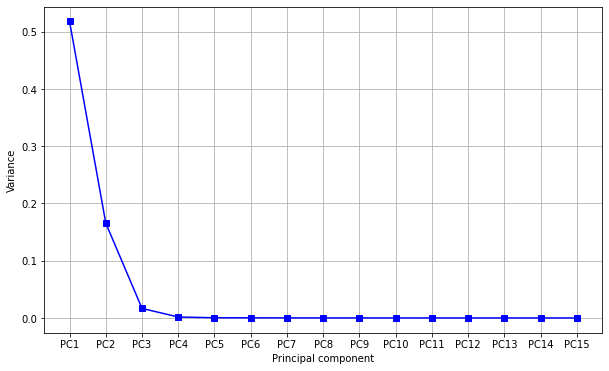

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plt.plot(pca.explained_variance_, 'bs-')
plt.ylabel("Variance")
plt.xlabel("Principal component")
plt.xticks(np.arange(0,15), ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])
plt.grid()
plt.show()

In [ ]:
scaled.df 